# Ансамбли

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import metrics

## Подготовка данных

In [18]:
df = pd.read_csv('data/possum.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   Pop       104 non-null    object 
 3   sex       104 non-null    object 
 4   age       102 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  103 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB


In [19]:
df['footlgth'] = df['footlgth'].fillna(0)
df['age'] = df['age'].fillna(0)
df['Pop'] = pd.get_dummies(df['Pop']).iloc[:,:1]  # Vic=1, other = 0
df['sex'] = pd.get_dummies(df['sex']).iloc[:,1:]  # male=1, female = 0
df['Pop']=df['Pop'].astype(float)
df['sex']=df['sex'].astype(float)

In [ ]:
X=df.drop(columns=['hdlngth','case'])
y=df['hdlngth']

print(X)
print(y)

     site  Pop  sex  age  skullw  totlngth  taill  footlgth  earconch   eye  \
0       1  1.0  1.0  8.0    60.4      89.0   36.0      74.5      54.5  15.2   
1       1  1.0  0.0  6.0    57.6      91.5   36.5      72.5      51.2  16.0   
2       1  1.0  0.0  6.0    60.0      95.5   39.0      75.4      51.9  15.5   
3       1  1.0  0.0  6.0    57.1      92.0   38.0      76.1      52.2  15.2   
4       1  1.0  0.0  2.0    56.3      85.5   36.0      71.0      53.2  15.1   
..    ...  ...  ...  ...     ...       ...    ...       ...       ...   ...   
99      7  0.0  1.0  1.0    56.0      81.5   36.5      66.0      46.8  14.8   
100     7  0.0  1.0  1.0    54.7      82.5   39.0      64.4      48.0  14.0   
101     7  0.0  0.0  6.0    55.0      89.0   38.0      63.5      45.4  13.0   
102     7  0.0  1.0  4.0    55.2      82.5   36.5      62.9      45.9  15.4   
103     7  0.0  0.0  3.0    59.9      89.0   40.0      67.6      46.0  14.8   

     chest  belly  
0     28.0   36.0  
1     28.5 

## Стекинг

In [ ]:
#Модель стекинга над линейной регрессией и деревом решений
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import StackingRegressor

estim = [('lr', LinearRegression()), ('dt', DecisionTreeRegressor())]
model = StackingRegressor(estimators=estim, final_estimator=SVR(kernel='linear'))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=41)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Root Mean Squared Error: {}'.format(round(metrics.mean_squared_error(y_pred, y_test),4)))
print('Mean Absolute Error: {}'.format(round(metrics.mean_absolute_error(y_pred, y_test),4)))
print('R2 Error: {}'.format(round(metrics.r2_score(y_pred, y_test),4)))

Root Mean Squared Error: 13.0884
Mean Absolute Error: 2.3376
R2 Error: 0.4492


In [ ]:
#Модель линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Root Mean Squared Error: {}'.format(round(metrics.mean_squared_error(y_pred, y_test),4)))
print('Mean Absolute Error: {}'.format(round(metrics.mean_absolute_error(y_pred, y_test),4)))
print('R2 Error: {}'.format(round(metrics.r2_score(y_pred, y_test),4)))

Root Mean Squared Error: 19.116
Mean Absolute Error: 2.5059
R2 Error: 0.3892


## Бэггинг

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   Pop       104 non-null    float64
 3   sex       104 non-null    float64
 4   age       104 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  104 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 11.5 KB


In [ ]:
print(X)
print(y)

     site  Pop  sex  age  skullw  totlngth  taill  footlgth  earconch   eye  \
0       1  1.0  1.0  8.0    60.4      89.0   36.0      74.5      54.5  15.2   
1       1  1.0  0.0  6.0    57.6      91.5   36.5      72.5      51.2  16.0   
2       1  1.0  0.0  6.0    60.0      95.5   39.0      75.4      51.9  15.5   
3       1  1.0  0.0  6.0    57.1      92.0   38.0      76.1      52.2  15.2   
4       1  1.0  0.0  2.0    56.3      85.5   36.0      71.0      53.2  15.1   
..    ...  ...  ...  ...     ...       ...    ...       ...       ...   ...   
99      7  0.0  1.0  1.0    56.0      81.5   36.5      66.0      46.8  14.8   
100     7  0.0  1.0  1.0    54.7      82.5   39.0      64.4      48.0  14.0   
101     7  0.0  0.0  6.0    55.0      89.0   38.0      63.5      45.4  13.0   
102     7  0.0  1.0  4.0    55.2      82.5   36.5      62.9      45.9  15.4   
103     7  0.0  0.0  3.0    59.9      89.0   40.0      67.6      46.0  14.8   

     chest  belly  
0     28.0   36.0  
1     28.5 

In [ ]:
#Модель бэггинга над линейной регрессией
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import LinearRegression

model = BaggingRegressor(base_estimator=LinearRegression(),  n_estimators=7, random_state=41, verbose=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=41)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Root Mean Squared Error: {}'.format(round(metrics.mean_squared_error(y_pred, y_test),4)))
print('Mean Absolute Error: {}'.format(round(metrics.mean_absolute_error(y_pred, y_test),4)))
print('R2 Error: {}'.format(round(metrics.r2_score(y_pred, y_test),4)))

Root Mean Squared Error: 17.6046
Mean Absolute Error: 2.5322
R2 Error: 0.4253


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


## Бустинг

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LinearRegression

model = AdaBoostRegressor(base_estimator=LinearRegression(),  n_estimators=20, random_state=41)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=41)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Root Mean Squared Error: {}'.format(round(metrics.mean_squared_error(y_pred, y_test),4)))
print('Mean Absolute Error: {}'.format(round(metrics.mean_absolute_error(y_pred, y_test),4)))
print('R2 Error: {}'.format(round(metrics.r2_score(y_pred, y_test),4)))

Root Mean Squared Error: 11.3555
Mean Absolute Error: 2.2217
R2 Error: 0.5075


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


# Нейронные сети

In [20]:
import keras
from keras.models import Sequential
from keras.layers import Input
from keras.layers import Dense

In [21]:
#построение нейронной сети
model = Sequential()
model.add(Input(shape=(12,)))
model.add(Dense(24, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(1, activation='relu'))
model.compile(loss='mse', metrics=['mae'], optimizer='adam')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 24)                312       
                                                                 
 dense_4 (Dense)             (None, 12)                300       
                                                                 
 dense_5 (Dense)             (None, 1)                 13        
                                                                 
Total params: 625
Trainable params: 625
Non-trainable params: 0
_________________________________________________________________


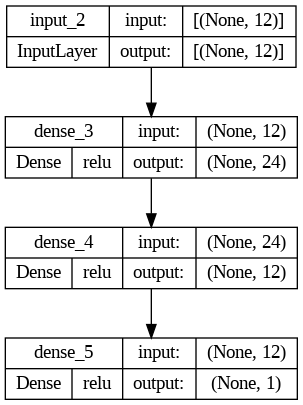

In [22]:
#графическое представление
from tensorflow.keras.utils import plot_model
import pydot
import graphviz

plot_model(model, show_shapes=True,show_layer_activations=True)

In [23]:
#обучение
X=df.drop(columns=['hdlngth','case'])
y=df['hdlngth']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=41)
model.fit(X_train, y_train, epochs=50, validation_split=0.1)

Epoch 1/50
3/3 [==============================] - 3s 155ms/step - loss: 1781.6686 - mae: 42.0882 - val_loss: 1418.5737 - val_mae: 37.6502
Epoch 2/50
3/3 [==============================] - 0s 30ms/step - loss: 1335.8282 - mae: 36.4374 - val_loss: 1020.6584 - val_mae: 31.9293
Epoch 3/50
3/3 [==============================] - 0s 44ms/step - loss: 955.2167 - mae: 30.7623 - val_loss: 689.5417 - val_mae: 26.2336
Epoch 4/50
3/3 [==============================] - 0s 36ms/step - loss: 640.2986 - mae: 25.1295 - val_loss: 427.7617 - val_mae: 20.6461
Epoch 5/50
3/3 [==============================] - 0s 36ms/step - loss: 393.1526 - mae: 19.5928 - val_loss: 234.2062 - val_mae: 15.2490
Epoch 6/50
3/3 [==============================] - 0s 57ms/step - loss: 214.3863 - mae: 14.2836 - val_loss: 105.2484 - val_mae: 10.1679
Epoch 7/50
3/3 [==============================] - 0s 47ms/step - loss: 95.7984 - mae: 9.3127 - val_loss: 33.0385 - val_mae: 5.5669
Epoch 8/50
3/3 [==============================] - 0s 3

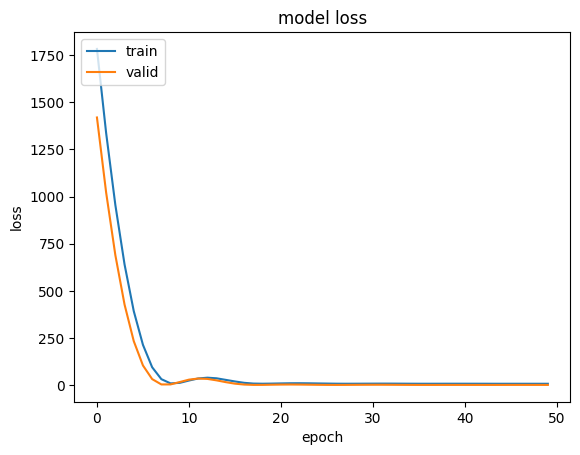

In [24]:
#визуализация обучения: потери
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

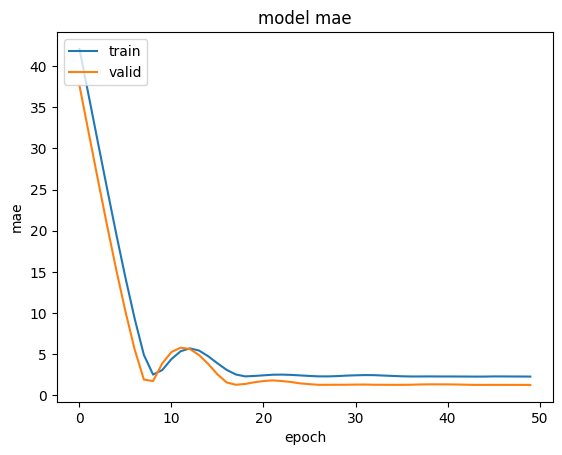

In [25]:
#визуализация обучения: метрики
plt.plot(model.history.history['mae'])
plt.plot(model.history.history['val_mae'])
plt.title('model mae')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

# Классификация: бустинг и нейронные сети

In [26]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [27]:
X=df.drop(columns=['sex','case'])
y=df['sex']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=41)

In [28]:
#построение нейронной сети
model = Sequential()
model.add(Dense(24, input_shape=(X.shape[1],), activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',metrics=['accuracy'], optimizer='adam')
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 24)                312       
                                                                 
 dense_7 (Dense)             (None, 12)                300       
                                                                 
 dense_8 (Dense)             (None, 1)                 13        
                                                                 
Total params: 625
Trainable params: 625
Non-trainable params: 0
_________________________________________________________________


In [29]:
#обучение
model.fit(X_train, y_train, epochs=20, validation_split=0.1)

Epoch 1/20
3/3 [==============================] - 1s 139ms/step - loss: 15.0572 - accuracy: 0.5571 - val_loss: 10.8048 - val_accuracy: 0.6250
Epoch 2/20
3/3 [==============================] - 0s 36ms/step - loss: 12.7495 - accuracy: 0.5571 - val_loss: 9.0891 - val_accuracy: 0.6250
Epoch 3/20
3/3 [==============================] - 0s 34ms/step - loss: 10.8872 - accuracy: 0.5571 - val_loss: 7.4102 - val_accuracy: 0.6250
Epoch 4/20
3/3 [==============================] - 0s 35ms/step - loss: 8.7819 - accuracy: 0.5571 - val_loss: 5.8372 - val_accuracy: 0.6250
Epoch 5/20
3/3 [==============================] - 0s 34ms/step - loss: 6.8176 - accuracy: 0.5571 - val_loss: 4.3003 - val_accuracy: 0.6250
Epoch 6/20
3/3 [==============================] - 0s 25ms/step - loss: 4.9478 - accuracy: 0.5571 - val_loss: 2.7397 - val_accuracy: 0.6250
Epoch 7/20
3/3 [==============================] - 0s 34ms/step - loss: 3.1195 - accuracy: 0.5571 - val_loss: 1.2043 - val_accuracy: 0.6250
Epoch 8/20
3/3 [======

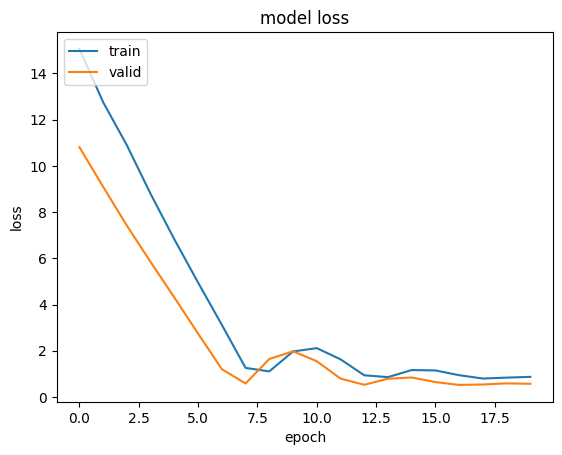

In [30]:
#график потерь
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

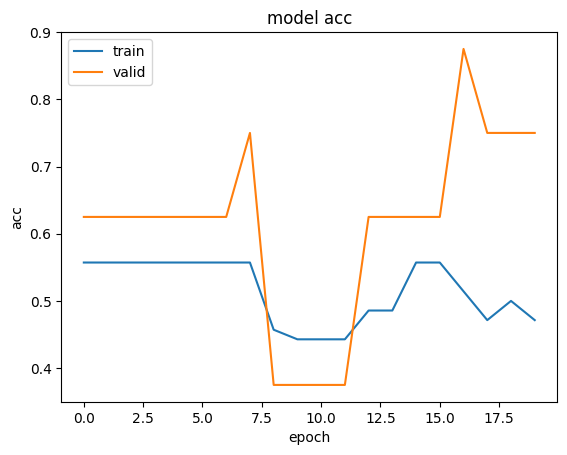

In [31]:
#график метрики
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('model acc')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

# Бустинг в задаче классификации

In [32]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression

X=df.drop(columns=['sex','case'])
y=df['sex']


model =AdaBoostClassifier(base_estimator=LogisticRegression(),  n_estimators=20, random_state=41)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=41)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Accuracy: {}'.format(round(metrics.accuracy_score(y_pred, y_test),4)))

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/

Accuracy: 0.6923


# Набор данных FashionMNIST

In [33]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
#импортируем набор данных для распознавания предметов одежды
df = pd.read_csv('data/fashion-mnist_train.csv')
X = df.drop(columns=['label'])
y = df['label'].to_numpy()
X.shape , y.shape

((60000, 784), (60000,))

In [35]:
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,5,0,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,1,2,0,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


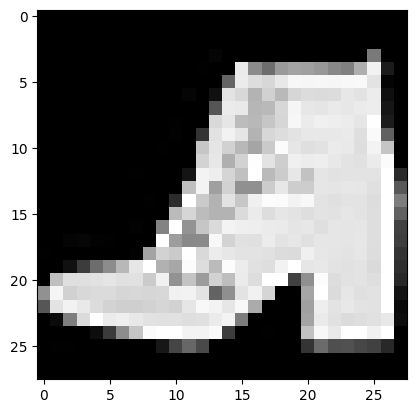

In [36]:
#визуализация набора данных
Iindex = 42
img = df.loc[Iindex, df.columns != "label"].values.reshape((28,28))
plt.imshow(img,cmap='gray')

In [37]:
import keras
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [38]:
X_scaled = MinMaxScaler().fit_transform(X)
print(X_scaled.min(), X_scaled.max())
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,train_size=0.75,random_state=41)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

0.0 1.0
(45000, 784) (15000, 784) (45000,) (15000,)


In [39]:
#наивный подход
model = keras.Sequential(
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
)
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,epochs=20, validation_split=0.2)

Epoch 1/20
1125/1125 [==============================] - 4s 3ms/step - loss: 0.6784 - accuracy: 0.7704 - val_loss: 0.5266 - val_accuracy: 0.8214
Epoch 2/20
1125/1125 [==============================] - 3s 2ms/step - loss: 0.4978 - accuracy: 0.8296 - val_loss: 0.4721 - val_accuracy: 0.8403
Epoch 3/20
1125/1125 [==============================] - 3s 2ms/step - loss: 0.4638 - accuracy: 0.8397 - val_loss: 0.4547 - val_accuracy: 0.8456
Epoch 4/20
1125/1125 [==============================] - 3s 2ms/step - loss: 0.4444 - accuracy: 0.8465 - val_loss: 0.4427 - val_accuracy: 0.8531
Epoch 5/20
1125/1125 [==============================] - 3s 3ms/step - loss: 0.4343 - accuracy: 0.8501 - val_loss: 0.4386 - val_accuracy: 0.8498
Epoch 6/20
1125/1125 [==============================] - 2s 2ms/step - loss: 0.4226 - accuracy: 0.8538 - val_loss: 0.4416 - val_accuracy: 0.8490
Epoch 7/20
1125/1125 [==============================] - 2s 2ms/step - loss: 0.4166 - accuracy: 0.8553 - val_loss: 0.4510 - val_accuracy:

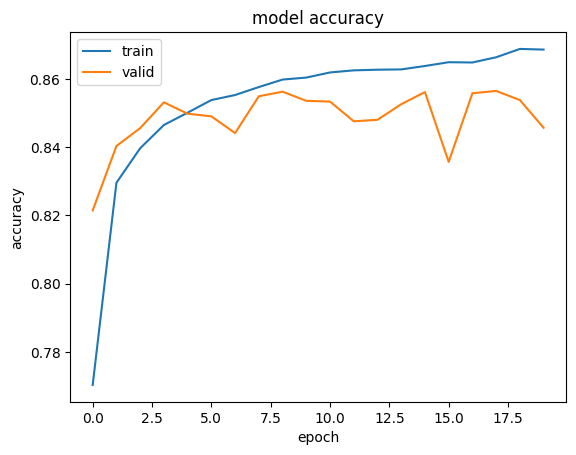

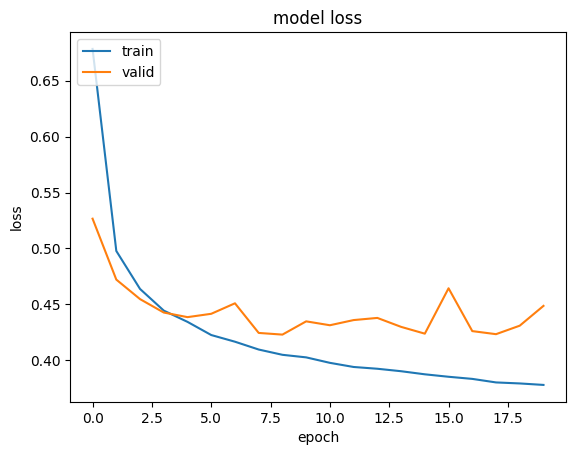

In [40]:
#графики обучения
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()


plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

In [41]:
model.evaluate(X_test,y_test)

469/469 [==============================] - 1s 2ms/step - loss: 0.4378 - accuracy: 0.8468


[0.4378288686275482, 0.8468000292778015]

In [42]:
#улучшим модель
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    
    keras.layers.Dense(10,  activation='softmax')]
)
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,epochs=20, validation_split=0.2)

Epoch 1/20
1125/1125 [==============================] - 6s 5ms/step - loss: 0.5513 - accuracy: 0.8045 - val_loss: 0.4088 - val_accuracy: 0.8534
Epoch 2/20
1125/1125 [==============================] - 5s 4ms/step - loss: 0.4015 - accuracy: 0.8558 - val_loss: 0.4320 - val_accuracy: 0.8378
Epoch 3/20
1125/1125 [==============================] - 5s 5ms/step - loss: 0.3631 - accuracy: 0.8684 - val_loss: 0.3498 - val_accuracy: 0.8710
Epoch 4/20
1125/1125 [==============================] - 6s 6ms/step - loss: 0.3357 - accuracy: 0.8771 - val_loss: 0.3369 - val_accuracy: 0.8769
Epoch 5/20
1125/1125 [==============================] - 10s 9ms/step - loss: 0.3148 - accuracy: 0.8851 - val_loss: 0.3449 - val_accuracy: 0.8722
Epoch 6/20
1125/1125 [==============================] - 8s 7ms/step - loss: 0.2985 - accuracy: 0.8893 - val_loss: 0.3425 - val_accuracy: 0.8806
Epoch 7/20
1125/1125 [==============================] - 5s 5ms/step - loss: 0.2879 - accuracy: 0.8930 - val_loss: 0.3617 - val_accuracy

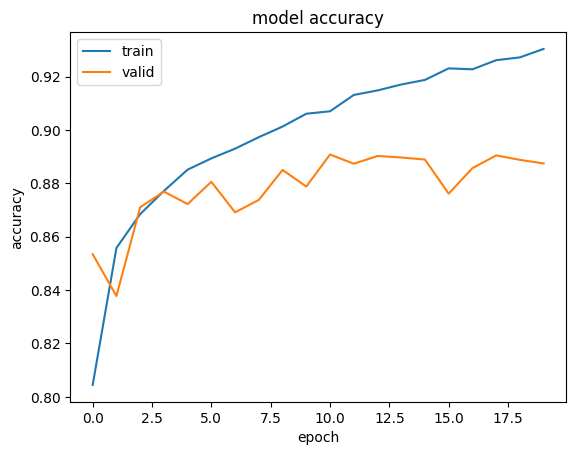

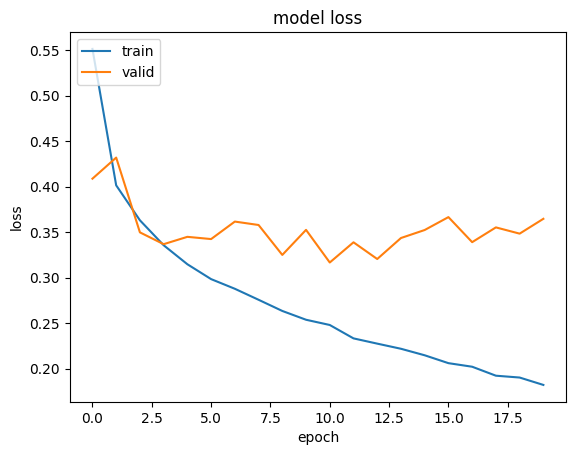

In [43]:
#Графики обучения
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()


plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()